In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

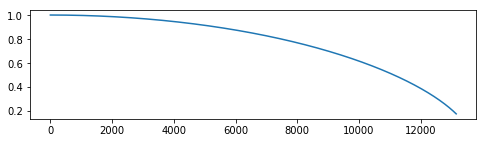

3.65314 hours, 131514 steps (upper bound mode)


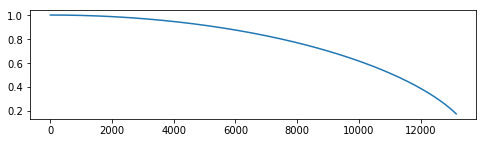

3.65373 hours, 13154 steps (upper bound mode)


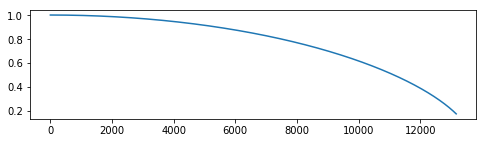

3.65964 hours, 1318 steps (upper bound mode)


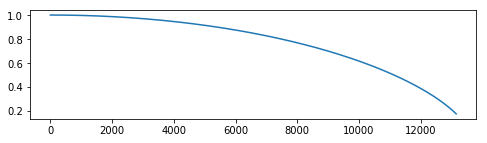

3.65311 hours, 131513 steps


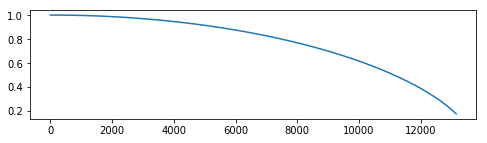

3.65344 hours, 13153 steps


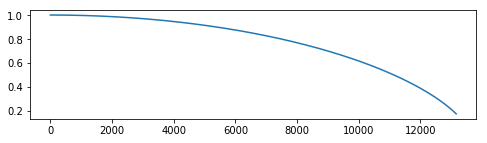

3.65674 hours, 1317 steps


In [2]:
R0_val = 1
Rx_val = 0.1744
GM_val = 100 * 6.67430e-11

class SystemModel:
    def __init__(self, upper_bound=False):
        self.upper = upper_bound
        self.r = 1
        self.v = 0
        self.t = 0
    def step(self, delta_t):
        a = GM_val/self.r**2
        if self.upper:
            self.r -= self.v * delta_t
        else:
            self.r -= (self.v + (a*delta_t)/2) * delta_t
        self.v += a * delta_t
        self.t += delta_t

for upper in [True, False]:
    for stepsize in [0.1, 1, 10]:
        s = SystemModel(upper)
        t_vals = []
        r_vals = []

        while True:
            t_vals.append(s.t)
            r_vals.append(s.r)
            if s.r < Rx_val:
                break
            s.step(stepsize)

        overhang = Rx_val - r_vals[-1]
        r_span = r_vals[-1] - r_vals[-2]
        t_span = t_vals[-1] - t_vals[-2]
        t = t_vals[-1] - overhang*t_span/r_span

        plt.figure(figsize=(8, 2))
        plt.plot(t_vals, r_vals)
        plt.show()
        print("%.5f hours, %d steps%s" % (t / 3600, len(t_vals),
                    " (upper bound mode)" if upper else ""))

In [3]:
t,GM = symbols("t,GM")
r = Function("r")
drdt1 = Derivative(r(t), t, 1)
drdt2 = Derivative(r(t), t, 2)
a = -GM/(r(t)**2)
a

-GM/r(t)**2

In [4]:
de = Eq(drdt2, a)
de

Eq(Derivative(r(t), (t, 2)), -GM/r(t)**2)